# ***Affairs_Predection***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/affairs.csv")

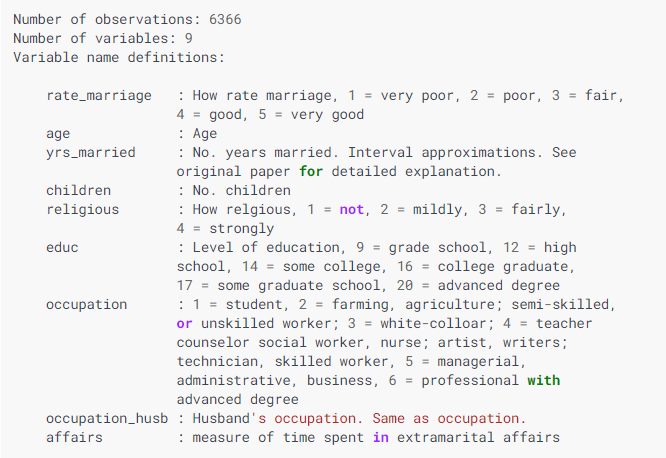

In [3]:
df['affair'] = (df.affairs > 0).astype(int)

In [4]:
df.head()

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [5]:
df.tail()

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
6361,6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0,0
6362,6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0,0
6363,6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0,0
6364,6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0,0
6365,6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6366 non-null   int64  
 1   rate_marriage    6366 non-null   float64
 2   age              6366 non-null   float64
 3   yrs_married      6366 non-null   float64
 4   children         6366 non-null   float64
 5   religious        6366 non-null   float64
 6   educ             6366 non-null   float64
 7   occupation       6366 non-null   float64
 8   occupation_husb  6366 non-null   float64
 9   affairs          6366 non-null   float64
 10  affair           6366 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 547.2 KB


In [7]:
df.drop(["Unnamed: 0","affairs"],axis=1,inplace=True)

In [8]:
df.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
rate_marriage,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.181446


In [9]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


In [10]:
df.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
affair,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559


In [11]:
df.max()

rate_marriage       5.0
age                42.0
yrs_married        23.0
children            5.5
religious           4.0
educ               20.0
occupation          6.0
occupation_husb     6.0
affair              1.0
dtype: float64

In [12]:
df.min()

rate_marriage       1.0
age                17.5
yrs_married         0.5
children            0.0
religious           1.0
educ                9.0
occupation          1.0
occupation_husb     1.0
affair              0.0
dtype: float64

In [13]:
import ipywidgets as widgets
from IPython.display import display

In [14]:
wig_col =widgets.Dropdown(
    options =[col for col in df.columns.tolist()],
    description='Plot Visulization',
    disabled=False,
    layout=widgets.Layout(width='25%',height='30px')
)

Dropdown(description='Plot Visulization', layout=Layout(height='30px', width='25%'), options=('rate_marriage',…

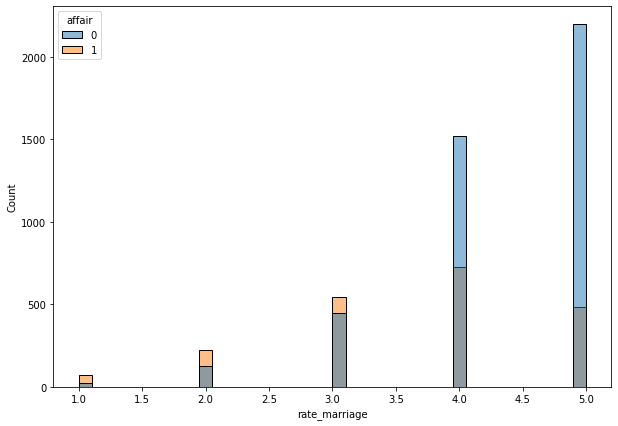

In [15]:
display(wig_col)
plt.figure(figsize=(10,7))
sns.histplot(x=wig_col.value,data=df,hue='affair')
sns.set_style('whitegrid')

In [16]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0


In [17]:
for col in df.columns:
  print(col,',','Unique:',len(df[col].unique()))

rate_marriage , Unique: 5
age , Unique: 6
yrs_married , Unique: 7
children , Unique: 6
religious , Unique: 4
educ , Unique: 6
occupation , Unique: 6
occupation_husb , Unique: 6
affair , Unique: 2


In [18]:
df.corr(method='pearson',min_periods=1)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.129299
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,0.017637
affair,-0.331776,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.028981,0.017637,1.000000


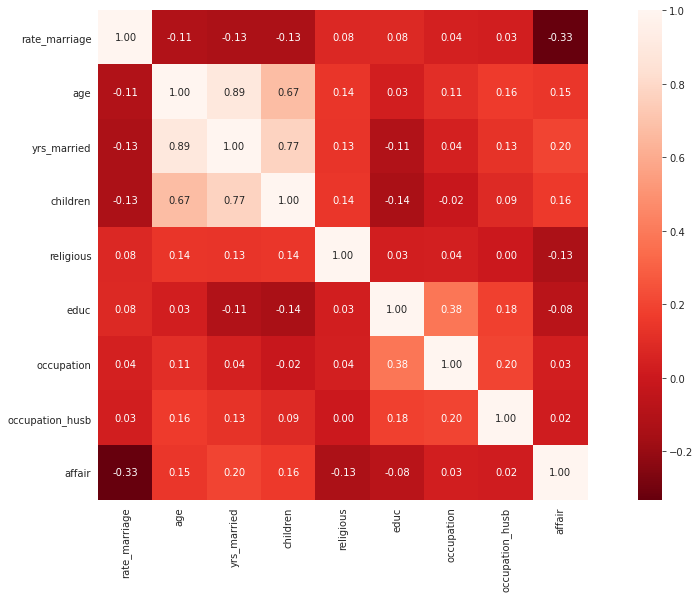

In [19]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':10},cmap='Reds_r')

# cmap: color comibnation

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magm...

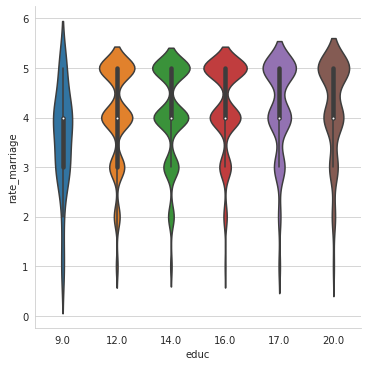

In [20]:
sns.catplot(x='educ',y='rate_marriage',data=df,kind='violin')

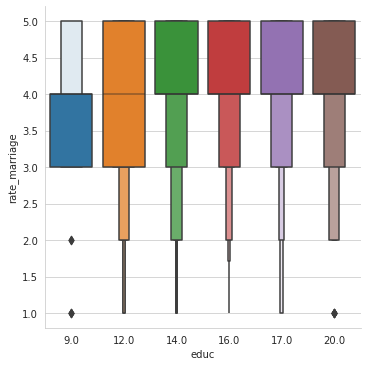

In [21]:
sns.catplot(x='educ',y='rate_marriage',data=df,kind='boxen')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [23]:
from sklearn import metrics

In [24]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [25]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0


In [26]:
X.shape

(6366, 8)

In [27]:
X

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0
...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0


In [28]:
y.shape

(6366,)

In [29]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

In [30]:
model1=LogisticRegression()
model1.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred1=model1.predict(X_test)
print('Coefficients: \n', model1.coef_)
print("Mean squared error: %.2f" % np.mean((model1.predict(X_test) - y_test) ** 2))
print('Variance score: %.2f' % model1.score(X_test, y_test))

Coefficients: 
 [[-0.71849035 -0.05575688  0.10923858 -0.03276862 -0.38489022 -0.03577232
   0.17050918 -0.01516019]]
Mean squared error: 0.27
Variance score: 0.73


In [32]:
model1=LogisticRegression()
model1.fit(X_train,y_train)
model2=SVC()
model2.fit(X_train,y_train)
model3=DecisionTreeClassifier()
model3.fit(X_train,y_train)
model4=RandomForestClassifier()
model4.fit(X_train,y_train)
model5=KNeighborsClassifier()
model5.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)
y_pred3=model3.predict(X_test)
y_pred4=model4.predict(X_test)
y_pred5=model5.predict(X_test)

In [34]:
print("Accuracy_Score_LR:",metrics.accuracy_score(y_test,y_pred1))
print("Accuracy_Score_SVC:",metrics.accuracy_score(y_test,y_pred2))
print("Accuracy_Score_DTC:",metrics.accuracy_score(y_test,y_pred3))
print("Accuracy_Score_RFC:",metrics.accuracy_score(y_test,y_pred4))
print("Accuracy_Score_KNC:",metrics.accuracy_score(y_test,y_pred5))

Accuracy_Score_LR: 0.7319371727748691
Accuracy_Score_SVC: 0.7167539267015707
Accuracy_Score_DTC: 0.6554973821989529
Accuracy_Score_RFC: 0.6848167539267016
Accuracy_Score_KNC: 0.6910994764397905


In [35]:
X.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb'],
      dtype='object')

In [36]:
details={'rate_marriage':2,'age':23,'yrs_married':2,'children':1,'religious':2,'edu':15,'occupation':2, 'occupation_husb':2}

In [37]:
df_Sabji_Wali=pd.DataFrame(details,index=['1'])

In [38]:
df_Sabji_Wali

,rate_marriage,age,yrs_married,children,religious,edu,occupation,occupation_husb
1,2,23,2,1,2,15,2,2


In [39]:
pred=model1.predict(df_Sabji_Wali)
if pred==1:
  print('Sabji wali in affair with Ghosh')
else:
  print('Sabji wali Ghosh ka kaat di')
print("%of Predection :",metrics.accuracy_score(y_test,y_pred1))

Sabji wali in affair with Ghosh
%of Predection : 0.7319371727748691


# ***#####Testing***





# ***PIPELINE***

In [40]:
pipe_LR=Pipeline([('scaler1',StandardScaler()),
                 ('LR',LogisticRegression())])
pipe_SVM =Pipeline([('scaler2',StandardScaler()),
                    ('SVR',SVC())])
pipe_DT=Pipeline([('scaler3',StandardScaler()),
                  ('DTR',DecisionTreeClassifier())])
pipe_RF=Pipeline([('scaler4',StandardScaler()),
                  ('RFR',RandomForestClassifier())])
pipe_Knn=Pipeline([('scaler4',StandardScaler()),
                   ('Knn',KNeighborsClassifier())])

In [41]:
pipeline1=[pipe_LR,pipe_SVM,pipe_DT,pipe_RF,pipe_Knn]

In [42]:
pipe_dict={0:'Logistic_Regression',1:'SVC',2:'Decesion_Tree_Classifier',3:'Random_Tree_classifier',4:'KNN_classifier'}

In [43]:
for pipe in pipeline1:
  pipe.fit(X_train,y_train)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
for i,model in enumerate(pipeline1):
  print("{}_Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic_Regression_Accuracy: 0.7319371727748691
SVC_Accuracy: 0.7282722513089005
Decesion_Tree_Classifier_Accuracy: 0.6539267015706807
Random_Tree_classifier_Accuracy: 0.6910994764397905
KNN_classifier_Accuracy: 0.6947643979057592


# ***ACCURACY_SCORE :0.731***